<a href="https://colab.research.google.com/github/RustamAliyevsHub/Playground/blob/main/Visualization_with_Matplotlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

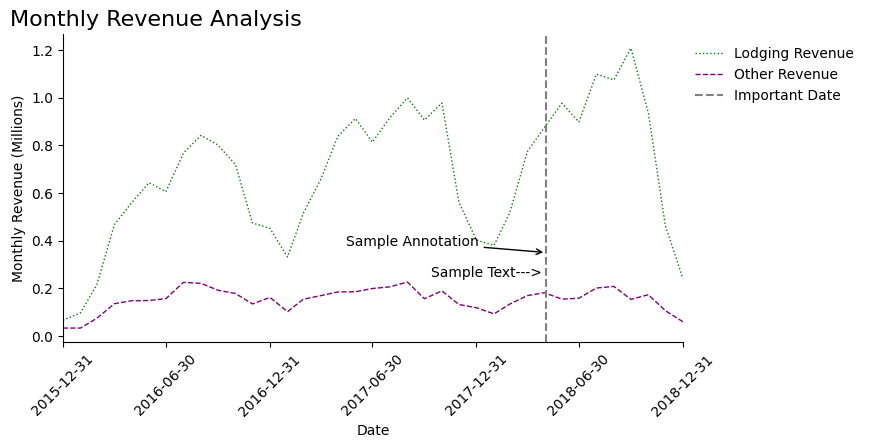

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the Excel file into a Pandas DataFrame
hotels = pd.read_excel("HotelCustomersDataset.xlsx")

# Define a reference date for calculations
reference_date = pd.to_datetime("2018-12-21")

# Calculate the 'date' column by subtracting 'DaysSinceCreation' from the reference date
hotels["date"] = reference_date - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")

# Group data by date and aggregate daily revenue to get total daily revenue
daily_revenue = hotels.groupby("date").agg({
    "LodgingRevenue": "sum",  # Sum of lodging revenue for each date
    "OtherRevenue": "sum"      # Sum of other revenues for each date
})

# Resample daily revenue data to obtain aggregated monthly revenue
monthly_revenue = daily_revenue.resample("M").sum()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot monthly revenue for lodging services in green with a dotted line
ax.plot(
    monthly_revenue.index, monthly_revenue["LodgingRevenue"]/1000000,
    label="Lodging Revenue", color="green", linewidth=1, ls=":"
)

# Plot monthly revenue for other services in purple with a dashed line
ax.plot(
    monthly_revenue.index, monthly_revenue["OtherRevenue"]/1000000,
    label="Other Revenue", color="purple", linewidth=1, ls="--"
)

# Set the title and axis labels for the plot
ax.set_title("Monthly Revenue Analysis", fontsize=16, x=0.15)
ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("Monthly Revenue (Millions)", fontsize=10)
ax.set_xticks(monthly_revenue.index[::6])

# Set the x-axis limits to the minimum and maximum dates in the data
ax.set_xlim(monthly_revenue.index.min(), monthly_revenue.index.max())

# Remove the right and top spines from the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Draw a vertical line at x = 17654, indicating a specific date
ax.axvline(17654, c="grey", ls="--", label = "Important Date")

ax.text(17450, .25, "Sample Text--->")

# Set the legend for the plotted lines, positioning it at the upper right
ax.legend(bbox_to_anchor=(1, 1), ncol=1, frameon=False)

# Annotate a point with text at a specified location
ax.annotate('Sample Annotation', xy=(17654, 0.35), xytext=(17300, 0.38),
           arrowprops=dict(facecolor='black', arrowstyle='->'))

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()